In [2]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import root_pandas
import pandas as pd
import uproot
import numpy as np
from scipy import stats

Welcome to JupyROOT 6.18/00


In [3]:
filedir = "/gpfs/group/belle2/users/loeschca/ElectricField/dataTestProton/"
filename = "PDG2212_45MeV_Vertex5050_Electric289_Magnetic1_101325Pa_DormandPrince745_seed10009.root"
name = filename[0:-5]
filename = filedir+filename
file = uproot.open(filename)
tree = file["tree"]

print(filename)

# get branch into numpy-like awardarray 
#branch = tree["TPCSimHits.m_pdg"]
#array = branch.array()

/gpfs/group/belle2/users/loeschca/ElectricField/dataTestProton/PDG2212_45MeV_Vertex5050_Electric289_Magnetic1_101325Pa_DormandPrince745_seed10009.root


In [5]:
TPCSimHits = pd.DataFrame({subbranch: tree[f"TPCSimHits.{subbranch}"].array().content for subbranch in ["m_pdg", "m_x", "m_y", "m_z", "m_globalTime"]})#, "m_Bx", "m_By", "m_Bz", "m_Ex", "m_Ey", "m_Ez"]})
TPCSimHits = TPCSimHits[(TPCSimHits["m_pdg"] == 2212)]
#TPCSimHits = TPCSimHits[(TPCSimHits["m_globalTime"] >= 70)]
TPCSimHits

,m_pdg,m_x,m_y,m_z,m_globalTime
0,2212,50.024360,50.024272,8.259853e-08,0.023944
1,2212,50.020802,50.020726,7.053223e-08,0.020447
2,2212,50.020141,50.020068,6.829352e-08,0.019798
3,2212,50.006415,50.006391,2.174979e-08,0.006305
4,2212,50.014287,50.014236,4.844468e-08,0.014044
5,2212,50.009590,50.009555,3.251566e-08,0.009426
6,2212,50.009881,50.009845,3.350362e-08,0.009712
7,2212,50.012460,50.012415,4.224716e-08,0.012247
8,2212,50.020157,50.020084,6.834683e-08,0.019813
9,2212,50.019396,50.019326,6.576526e-08,0.019065


In [6]:
def plot_xyprojection(xdata, ydata, hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', xlimlow=0.0, xlimup=0.0, ylimlow=0.0, ylimup=0.0, legendloc=2):
    fig, ax = plt.subplots()
    x = xdata
    y = ydata
    
    circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
    circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75)
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$x$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if xlimlow and xlimup:
        ax.set_xlim(xlimlow, xlimup)
    if ylimlow and ylimup:
        ax.set_ylim(ylimlow, ylimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccircle = ax.add_artist(circle1)
    ax.add_artist(circle2)
    
    fig.set_size_inches(10, 10)
    plt.title('Readout plane projection', fontsize=25)
    lgnd = plt.legend(handles=[tpchits, tpccircle],loc=legendloc, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

In [7]:
def plot_sideprojection(zdata, sidedata, sidename,hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', zlimlow=0.0, zlimup=0.0, sidelimlow=0.0, sidelimup=0.0):
    fig, ax = plt.subplots()
    x = zdata
    y = sidedata
    
    rect1 = plt.Rectangle((-83.12,44.85), 241.69, 64.55 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    rect2 = plt.Rectangle((-83.12,-109.4), 241.69, 64.55 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--')
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$'+sidename+'$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if zlimlow and zlimup:
        ax.set_xlim(zlimlow, zlimup)
    if sidelimlow and sidelimup:
        ax.set_ylim(sidelimlow, sidelimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    ax.add_artist(rect2)
    
    fig.set_size_inches(10, 10)
    plt.title('Side View of TPC Volume', fontsize=25)
    #lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    #lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

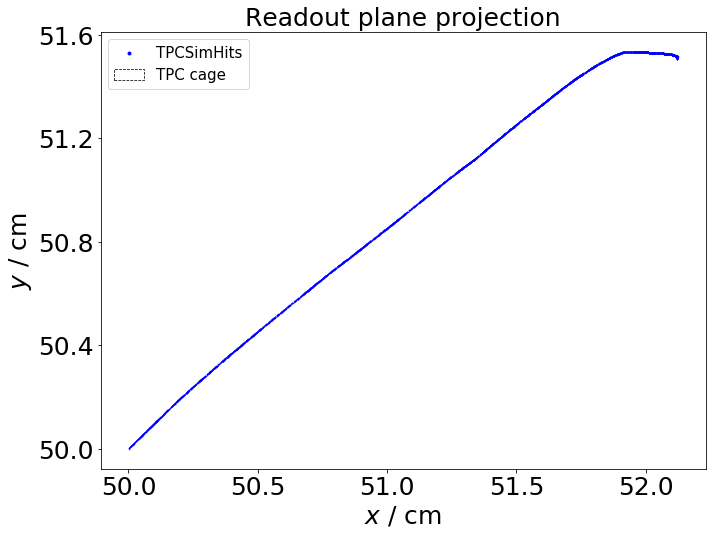

In [8]:
plot_xyprojection(TPCSimHits['m_x'], TPCSimHits['m_y'], hitcolor='blue', hitlabel='TPCSimHits', hitsize=1, savebool=False, savename=name+'.pdf')

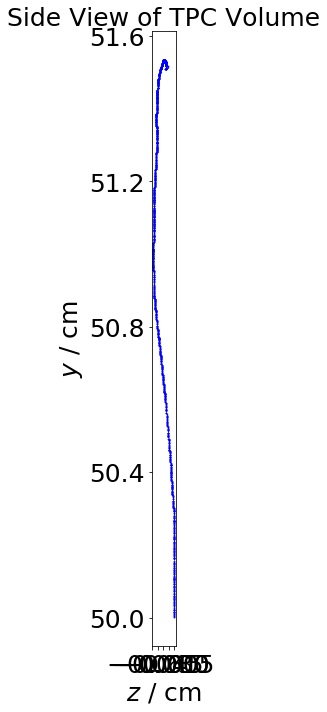

In [9]:
plot_sideprojection(TPCSimHits['m_z'], TPCSimHits['m_y'], 'y', hitcolor='blue', hitlabel='TPCSimHits', hitsize=1.0, savebool=True, savename=name+'_sideview.pdf')

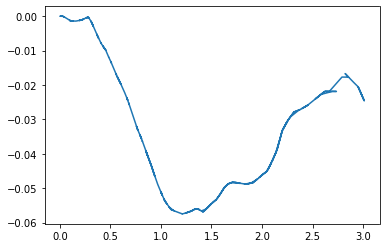

In [10]:
plt.plot(TPCSimHits["m_globalTime"], TPCSimHits["m_z"])

In [11]:
# plt.plot(TPCSimHits["m_globalTime"], TPCSimHits["m_Ez"])
#plt.plot(TPCSimHits["m_globalTime"], TPCSimHits["m_Bz"])

## Comparing multiple files (Electric field)

In [95]:
parname = "elecfield"
filedir = "/gpfs/group/belle2/users/loeschca/ElectricField/dataTestMuon/"+parname+"/"
seed = 10007
filemainname1 = "PDG13_90MeV_Vertex5050_"
filemainname2 = "_Magnetic1_101325Pa_seed"+str(seed)+".root"

filemainname1 = filedir+filemainname1

labelmain = "Electric"
label0 = labelmain + "No"
label1 = labelmain + "0"
label2 = labelmain + "3"
label3 = labelmain + "29"
label4 = labelmain + "289"


filename0 = filemainname1 + label0 + filemainname2
filename1 = filemainname1 + label1 + filemainname2
filename2 = filemainname1 + label2 + filemainname2
filename3 = filemainname1 + label3 + filemainname2
filename4 = filemainname1 + label4 + filemainname2

print(filename1)

/gpfs/group/belle2/users/loeschca/ElectricField/dataTestMuon/elecfield/PDG13_90MeV_Vertex5050_Electric0_Magnetic1_101325Pa_seed10007.root


In [96]:
def openfile(file_name):
    file = uproot.open(file_name)
    tree = file["tree"]
    SimHits = pd.DataFrame({subbranch: tree[f"TPCSimHits.{subbranch}"].array().content for subbranch in ["m_pdg", "m_x", "m_y", "m_z", "m_globalTime", "m_Bx", "m_By", "m_Bz", "m_Ex", "m_Ey", "m_Ez"]})
    SimHits = SimHits[SimHits["m_pdg"] == 13]
    return SimHits

In [97]:
SimHits0 = openfile(filename0)
SimHits1 = openfile(filename1)
SimHits2 = openfile(filename2)
SimHits3 = openfile(filename3)
SimHits4 = openfile(filename4)
SimHits0

,m_pdg,m_x,m_y,m_z,m_globalTime,m_Bx,m_By,m_Bz,m_Ex,m_Ey,m_Ez
0,13,50.172449,50.174473,-0.000123,0.012620,0.0,0.0,0.0,0.0,0.0,0.0
1,13,50.180300,50.182510,-0.000137,0.013198,0.0,0.0,0.0,0.0,0.0,0.0
2,13,50.185763,50.188115,-0.000146,0.013600,0.0,0.0,0.0,0.0,0.0,0.0
3,13,50.209136,50.212120,-0.000185,0.015324,0.0,0.0,0.0,0.0,0.0,0.0
4,13,50.220824,50.224154,-0.000202,0.016187,0.0,0.0,0.0,0.0,0.0,0.0
5,13,50.218053,50.221301,-0.000198,0.015982,0.0,0.0,0.0,0.0,0.0,0.0
6,13,50.206845,50.209761,-0.000182,0.015155,0.0,0.0,0.0,0.0,0.0,0.0
7,13,50.308827,50.315432,-0.000282,0.022709,0.0,0.0,0.0,0.0,0.0,0.0
8,13,50.389537,50.400163,-0.000340,0.028729,0.0,0.0,0.0,0.0,0.0,0.0
9,13,50.447926,50.461880,-0.000421,0.033100,0.0,0.0,0.0,0.0,0.0,0.0


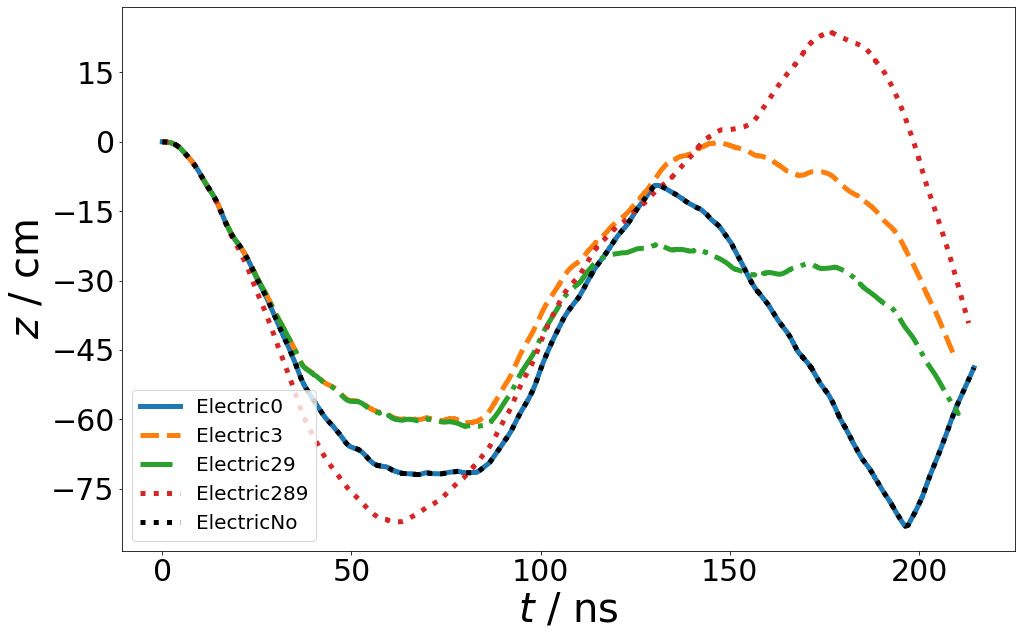

In [98]:
fig, ax = plt.subplots()

ax.plot(SimHits1["m_globalTime"], SimHits1["m_z"], label = label1, lw=5, ls='-')
ax.plot(SimHits2["m_globalTime"], SimHits2["m_z"], label = label2, lw=5, ls='--')
ax.plot(SimHits3["m_globalTime"], SimHits3["m_z"], label = label3, lw=5, ls='-.')
ax.plot(SimHits4["m_globalTime"], SimHits4["m_z"], label = label4, lw=5, ls=':')
ax.plot(SimHits0["m_globalTime"], SimHits0["m_z"], label = label0, lw=5, ls=':', color='black')

ax.set_xlabel('$t$ / ns', fontsize=40)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.set_xlim(-55, -40)
ax.set_ylabel('$z$ / cm', fontsize=40)
ax.yaxis.set_major_locator(plt.MaxNLocator(8))
#ax.set_ylim(15, 30)
ax.tick_params(labelsize=30)

fig.set_size_inches(16, 10)
plt.legend(fontsize=20, loc=3)
#plt.legend(bbox_to_anchor=(1.25, 1), fontsize=20)
plt.savefig(parname+str(seed)+'.pdf')
#plt.xlim(0,5)

In [82]:
name = 'PDG13_90MeV_Vertex5050_Electric289_Magnetic1_101325Pa_seed10006'

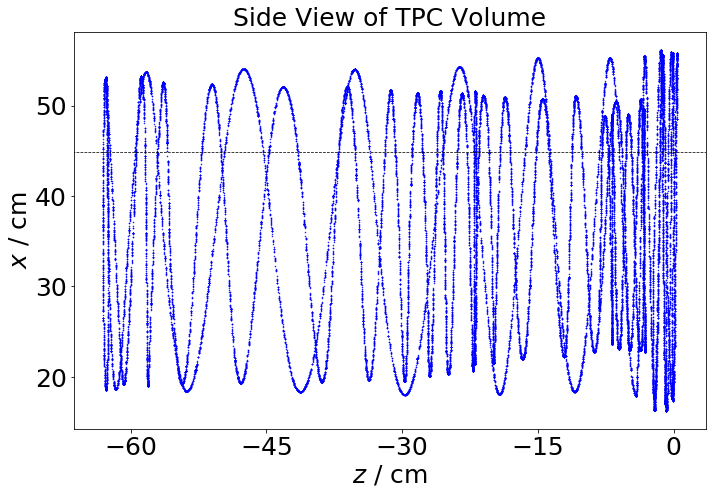

In [25]:
plot_sideprojection(SimHits4['m_z'], SimHits4['m_x'], 'x', hitcolor='blue', hitlabel='TPCSimHits', hitsize=1.0, savebool=True, savename=name+'_sideview.pdf')

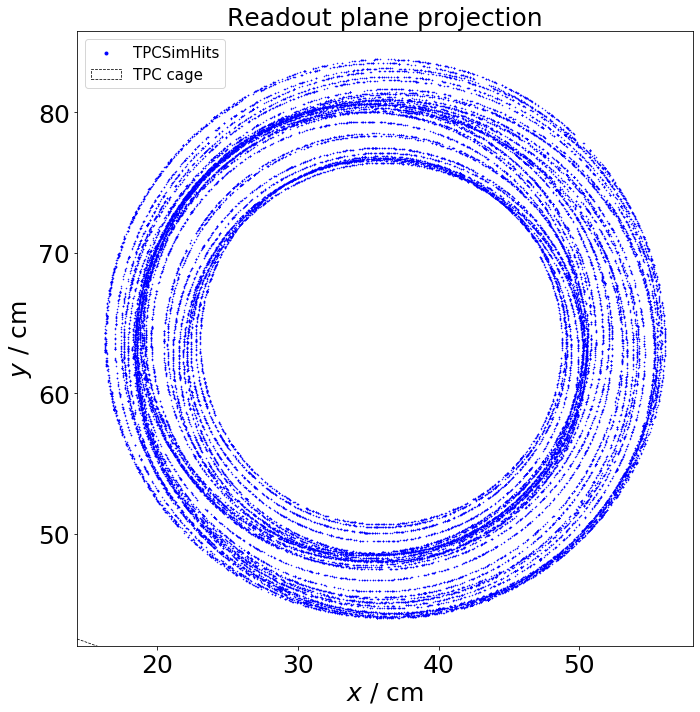

In [27]:
plot_xyprojection(SimHits1['m_x'], SimHits1['m_y'], hitcolor='blue', hitlabel='TPCSimHits', hitsize=1, savebool=True, savename=name+'.pdf')

## Comparing Steppers

In [46]:
parname = "stepper"
filedir = "/gpfs/group/belle2/users/loeschca/ElectricField/dataTestMuon/"+parname+"/"
seed = 10002
filemainname1 = "PDG13_45MeV_Vertex5050_Electric289_Magnetic1_101325Pa"
filemainname2 = "_seed"+str(seed)+".root"

filemainname1 = filedir+filemainname1

labelmain = ""
label0 = labelmain + "DormandPrince745"
label1 = labelmain + "BogackiShampine45"
label2 = labelmain + "CashKarpRKF45"
label3 = labelmain + "ClassicalRK4"


filename0 = filemainname1 + label0 + filemainname2
filename1 = filemainname1 + '_'+ label1 + filemainname2
filename2 = filemainname1 + '_'+ label2 + filemainname2
filename3 = filemainname1 + '_'+ label3 + filemainname2

print(filename1)

/gpfs/group/belle2/users/loeschca/ElectricField/dataTestMuon/stepper/PDG13_45MeV_Vertex5050_Electric289_Magnetic1_101325Pa_BogackiShampine45_seed10002.root


In [47]:
SimHits0 = openfile(filename0)
SimHits1 = openfile(filename1)
SimHits2 = openfile(filename2)
SimHits3 = openfile(filename3)
SimHits0

,m_pdg,m_x,m_y,m_z,m_globalTime,m_Bx,m_By,m_Bz,m_Ex,m_Ey,m_Ez
0,13,50.044133,50.044464,-0.000006,0.005333,-4.261673e-07,-4.268739e-07,0.001485,0.0,0.0,0.000029
1,13,50.067766,50.068500,-0.000010,0.008203,-4.263676e-07,-4.270776e-07,0.001485,0.0,0.0,0.000029
2,13,50.070759,50.071550,-0.000010,0.008566,-4.263930e-07,-4.271035e-07,0.001485,0.0,0.0,0.000029
3,13,50.070413,50.071198,-0.000010,0.008524,-4.263901e-07,-4.271005e-07,0.001485,0.0,0.0,0.000029
4,13,50.103453,50.105044,-0.000027,0.012551,-4.266702e-07,-4.273875e-07,0.001485,0.0,0.0,0.000029
5,13,50.134455,50.137105,-0.000080,0.016348,-4.269336e-07,-4.276599e-07,0.001485,0.0,0.0,0.000029
6,13,50.157347,50.160946,-0.000141,0.019161,-4.271283e-07,-4.278627e-07,0.001485,0.0,0.0,0.000029
7,13,50.162996,50.166858,-0.000162,0.019857,-4.271765e-07,-4.279131e-07,0.001485,0.0,0.0,0.000029
8,13,50.168788,50.172920,-0.000184,0.020571,-4.272258e-07,-4.279648e-07,0.001485,0.0,0.0,0.000029
9,13,50.165884,50.169881,-0.000173,0.020213,-4.272010e-07,-4.279388e-07,0.001485,0.0,0.0,0.000029


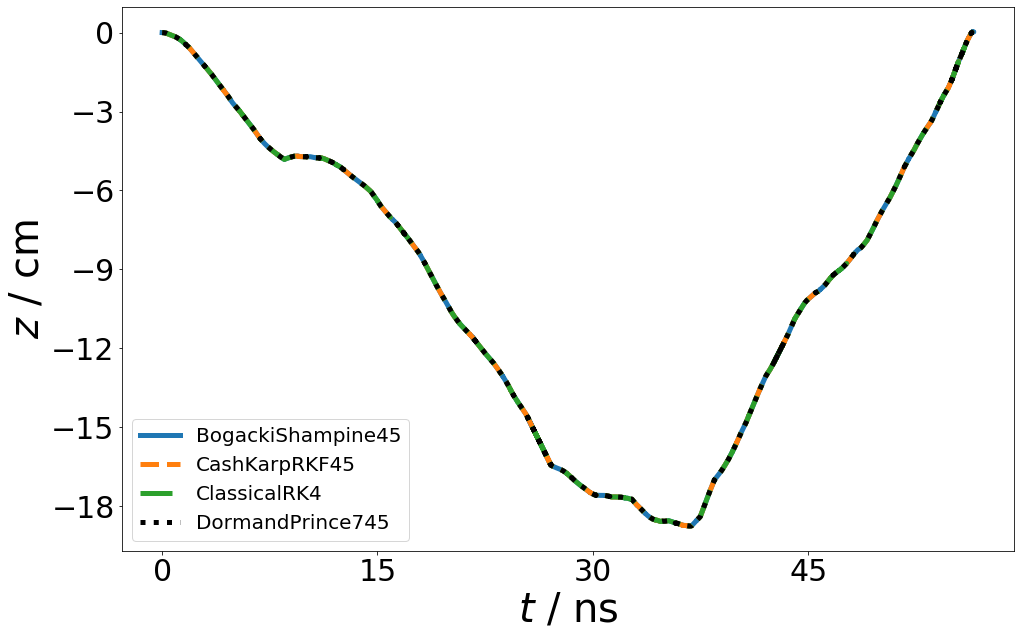

In [52]:
fig, ax = plt.subplots()

ax.plot(SimHits1["m_globalTime"], SimHits1["m_z"], label = label1, lw=5, ls='-')
ax.plot(SimHits2["m_globalTime"], SimHits2["m_z"], label = label2, lw=5, ls='--')
ax.plot(SimHits3["m_globalTime"], SimHits3["m_z"], label = label3, lw=5, ls='-.')
#ax.plot(SimHits4["m_globalTime"], SimHits4["m_z"], label = label4, lw=5, ls=':')
ax.plot(SimHits0["m_globalTime"], SimHits0["m_z"], label = label0, lw=5, ls=':', color='black')

ax.set_xlabel('$t$ / ns', fontsize=40)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.set_xlim(-55, -40)
ax.set_ylabel('$z$ / cm', fontsize=40)
ax.yaxis.set_major_locator(plt.MaxNLocator(8))
#ax.set_ylim(15, 30)
ax.tick_params(labelsize=30)

fig.set_size_inches(16, 10)
plt.legend(fontsize=20, loc=3)
#plt.legend(bbox_to_anchor=(1., 1), fontsize=20)
plt.savefig(parname+str(seed)+'.pdf')
#plt.xlim(0,5)

## Comparing Pressure

In [66]:
parname = "pressure"
filedir = "/gpfs/group/belle2/users/loeschca/ElectricField/dataTestMuon/"+parname+"/"
seed = 10003
filemainname1 = "PDG13_45MeV_Vertex5050_Electric300_Magnetic1_"
filemainname2 = "_seed"+str(seed)+".root"

filemainname1 = filedir+filemainname1

labelmain = "Pa"
label0 =  "101325" + labelmain
label1 =  "1" + labelmain
label2 =  "301325" + labelmain


filename0 = filemainname1 + label0 + filemainname2
filename1 = filemainname1 + label1 + filemainname2
filename2 = filemainname1 + label2 + filemainname2

print(filename1)

/gpfs/group/belle2/users/loeschca/ElectricField/dataTestMuon/pressure/PDG13_45MeV_Vertex5050_Electric300_Magnetic1_1Pa_seed10003.root


In [67]:
def openfilePa(file_name):
    file = uproot.open(file_name)
    tree = file["tree"]
    SimHits = pd.DataFrame({subbranch: tree[f"TPCSimHits.{subbranch}"].array().content for subbranch in ["m_pdg", "m_x", "m_y", "m_z", "m_globalTime"]})
    SimHits = SimHits[SimHits["m_pdg"] == 13]
    return SimHits

In [68]:
SimHits0 = openfilePa(filename0)
SimHits1 = openfilePa(filename1)
SimHits2 = openfilePa(filename2)
SimHits0

,m_pdg,m_x,m_y,m_z,m_globalTime
0,13,50.016889,50.016951,-2.543987e-08,0.002037
1,13,50.011500,50.011543,-1.732281e-08,0.001387
2,13,50.018235,50.018302,-2.746661e-08,0.002199
3,13,50.017011,50.017073,-2.562259e-08,0.002052
4,13,50.092285,50.093550,-2.383777e-05,0.011187
5,13,50.095447,50.096794,-2.514795e-05,0.011572
6,13,50.098784,50.100217,-2.653033e-05,0.011979
7,13,50.077874,50.078766,-1.786722e-05,0.009429
8,13,50.098245,50.099664,-2.630700e-05,0.011914
9,13,50.096795,50.098177,-2.570636e-05,0.011737


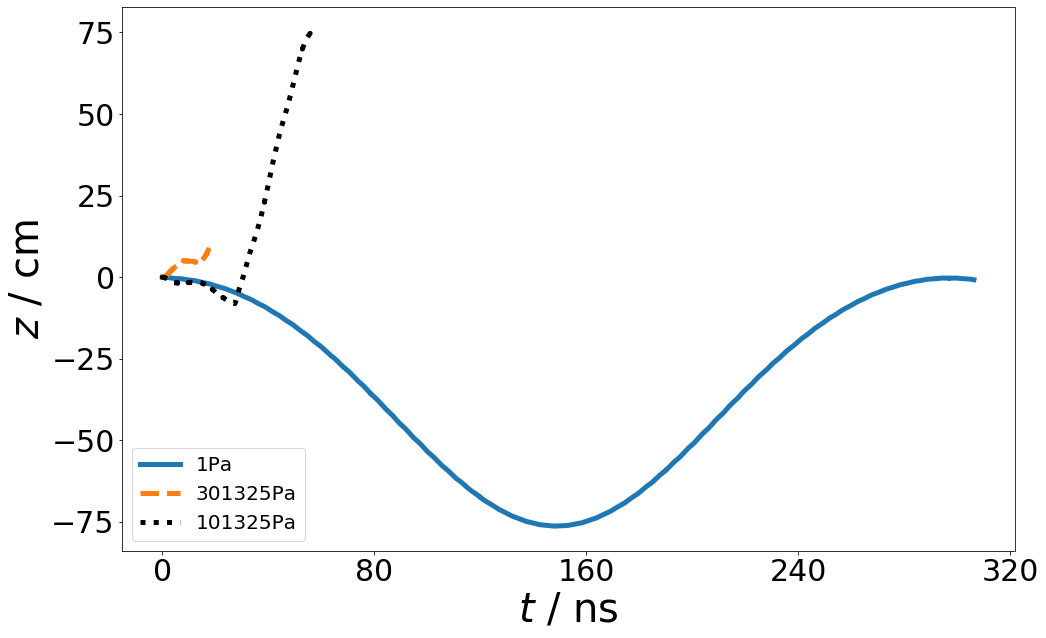

In [69]:
fig, ax = plt.subplots()

ax.plot(SimHits1["m_globalTime"], SimHits1["m_z"], label = label1, lw=5, ls='-')
ax.plot(SimHits2["m_globalTime"], SimHits2["m_z"], label = label2, lw=5, ls='--')
ax.plot(SimHits0["m_globalTime"], SimHits0["m_z"], label = label0, lw=5, ls=':', color='black')

ax.set_xlabel('$t$ / ns', fontsize=40)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.set_xlim(-55, -40)
ax.set_ylabel('$z$ / cm', fontsize=40)
ax.yaxis.set_major_locator(plt.MaxNLocator(8))
#ax.set_ylim(15, 30)
ax.tick_params(labelsize=30)

fig.set_size_inches(16, 10)
plt.legend(fontsize=20, loc=3)
#plt.legend(bbox_to_anchor=(1., 1), fontsize=20)
plt.savefig(parname+str(seed)+'.pdf')
#plt.xlim(0,5)

# Random Stuff

In [7]:
mergedSimHitsandDigits = pd.concat([TPCSimHits, TPCDigits], axis=1, sort=False)
# mergedSimHitsandDigits.rename(index={0: "S_pdg", 1: "S_x", 2: "S_z", 3: "D_x", 4: "D_y", 5: "D_dt"})
mergedSimHitsandDigits.columns = ["S_pdg", "S_x", "S_y", "S_z", "D_x", "D_y", "D_dt"]
mergedSimHitsandDigits

,S_pdg,S_x,S_y,S_z,D_x,D_y,D_dt
0,13,-41.383128,18.943006,17.479684,-41.376586,18.958792,13064.893992
1,13,-41.382293,18.942610,17.479342,-41.450243,18.895247,13064.849626
2,13,-41.383740,18.943295,17.479934,-41.367550,18.946657,13064.926464
3,13,-41.386033,18.944380,17.480871,-41.436636,18.802088,13065.048183
4,13,-41.382676,18.942792,17.479499,-41.396337,18.964815,13064.869962
...,...,...,...,...,...,...,...
63953,11,-46.819763,-23.096889,19.016852,-46.835448,-23.107994,13264.526237
63954,11,-46.819622,-23.096819,19.015950,-46.907475,-22.971913,13264.409117
63955,11,-46.819822,-23.096918,19.017229,-46.763828,-23.134082,13264.575236
63956,11,-46.819686,-23.096851,19.016364,-46.784888,-23.065218,13264.462824


In [8]:
mergedMuonHits = mergedSimHitsandDigits[abs(mergedSimHitsandDigits['S_pdg'])==13]
mergedMuonHits

,S_pdg,S_x,S_y,S_z,D_x,D_y,D_dt
0,13,-41.383128,18.943006,17.479684,-41.376586,18.958792,13064.893992
1,13,-41.382293,18.942610,17.479342,-41.450243,18.895247,13064.849626
2,13,-41.383740,18.943295,17.479934,-41.367550,18.946657,13064.926464
3,13,-41.386033,18.944380,17.480871,-41.436636,18.802088,13065.048183
4,13,-41.382676,18.942792,17.479499,-41.396337,18.964815,13064.869962
...,...,...,...,...,...,...,...
61401,-13,-99.939307,-43.500200,40.893808,-100.004605,-43.487508,16105.689330
61402,-13,-99.939956,-43.500416,40.894065,-99.906471,-43.427442,16105.722770
61403,-13,-99.954051,-43.505108,40.899654,-99.974815,-43.514534,16106.448565
61404,-13,-99.952597,-43.504624,40.899078,-99.997258,-43.435423,16106.373723


In [9]:
endplatez = -83.12

In [10]:
mergedMuonHits['S_driftlength'] = mergedMuonHits['S_z'] - endplatez
mergedMuonHits['xdiff'] = mergedMuonHits['S_x'] - mergedMuonHits['D_x']
mergedMuonHits['ydiff'] = mergedMuonHits['S_y'] - mergedMuonHits['D_y']
mergedMuonHits['xdiffnormed'] = mergedMuonHits['xdiff']*10000*np.sqrt(2.)/np.sqrt(mergedMuonHits['S_driftlength'])
mergedMuonHits['ydiffnormed'] = mergedMuonHits['ydiff']*10000*np.sqrt(2.)/np.sqrt(mergedMuonHits['S_driftlength'])

/cvmfs/belle.cern.ch/el7/externals/v01-09-01/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/cvmfs/belle.cern.ch/el7/externals/v01-09-01/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/cvmfs/belle.cern.ch/el7/externals/v01-09-01/Linux_x86_64/common/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWa

In [11]:
mergedMuonHits

,S_pdg,S_x,S_y,S_z,D_x,D_y,D_dt,S_driftlength,xdiff,ydiff,xdiffnormed,ydiffnormed
0,13,-41.383128,18.943006,17.479684,-41.376586,18.958792,13064.893992,100.599684,-0.006543,-0.015786,-9.225058,-22.258294
1,13,-41.382293,18.942610,17.479342,-41.450243,18.895247,13064.849626,100.599342,0.067950,0.047363,95.809145,66.781428
2,13,-41.383740,18.943295,17.479934,-41.367550,18.946657,13064.926464,100.599934,-0.016190,-0.003362,-22.827827,-4.740560
3,13,-41.386033,18.944380,17.480871,-41.436636,18.802088,13065.048183,100.600871,0.050604,0.142292,71.350176,200.629365
4,13,-41.382676,18.942792,17.479499,-41.396337,18.964815,13064.869962,100.599499,0.013661,-0.022024,19.261927,-31.053456
...,...,...,...,...,...,...,...,...,...,...,...,...
61401,-13,-99.939307,-43.500200,40.893808,-100.004605,-43.487508,16105.689330,124.013808,0.065298,-0.012692,82.924242,-16.117395
61402,-13,-99.939956,-43.500416,40.894065,-99.906471,-43.427442,16105.722770,124.014065,-0.033484,-0.072974,-42.522929,-92.672032
61403,-13,-99.954051,-43.505108,40.899654,-99.974815,-43.514534,16106.448565,124.019654,0.020764,0.009427,26.368415,11.970756
61404,-13,-99.952597,-43.504624,40.899078,-99.997258,-43.435423,16106.373723,124.019078,0.044661,-0.069201,56.715289,-87.878601


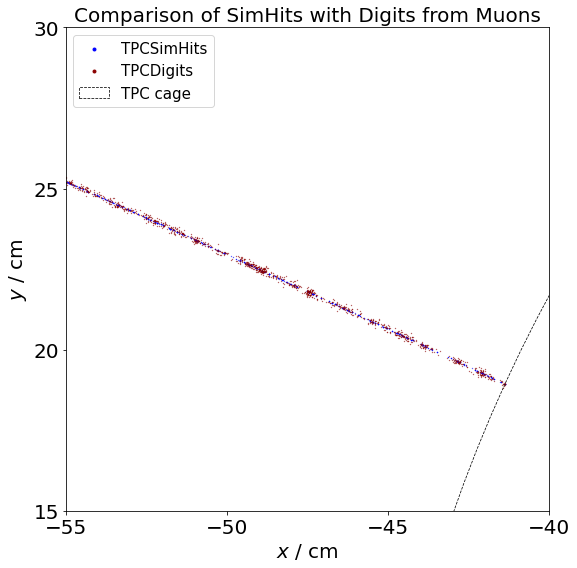

In [12]:
fig, ax = plt.subplots()
x_sims = mergedMuonHits['S_x']
y_sims = mergedMuonHits['S_y']
x_digs = mergedMuonHits['D_x']
y_digs = mergedMuonHits['D_y']

circle1 = plt.Circle((0, 0), 45.5, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
circle2 = plt.Circle((0, 0), 109.1, color='black', fill=False, ls='--', lw=0.75)

tpchits = ax.scatter(x_sims, y_sims, marker='.', s = 0.3, color='blue',label='TPCSimHits')
tpcdigs = ax.scatter(x_digs, y_digs, marker='.', s = 0.3, color='darkred',label='TPCDigits')
ax.set_xlabel('$x$ / cm', fontsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_xlim(-55, -40)
ax.set_ylabel('$y$ / cm', fontsize=20)
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_ylim(15, 30)

ax.tick_params(labelsize=20)

tpccircle = ax.add_artist(circle1)
ax.add_artist(circle2)


fig.set_size_inches(8, 8)
ax.set_aspect('equal')
plt.title('Comparison of SimHits with Digits from Muons', fontsize=20)
lgnd = plt.legend(handles=[tpchits, tpcdigs, tpccircle],loc=2, prop={'size':15})
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
fig.tight_layout()
plt.savefig('Muons10_1_4_GeV_SimHits_Digits_onlyMuons.pdf')
plt.show()
plt.close()

In [13]:
TPCSimHitcopy = TPCSimHits
TPCSimHitcopy

,m_pdg,m_x,m_y,m_z
0,13,-41.383128,18.943006,17.479684
1,13,-41.382293,18.942610,17.479342
2,13,-41.383740,18.943295,17.479934
3,13,-41.386033,18.944380,17.480871
4,13,-41.382676,18.942792,17.479499
...,...,...,...,...
63953,11,-46.819763,-23.096889,19.016852
63954,11,-46.819622,-23.096819,19.015950
63955,11,-46.819822,-23.096918,19.017229
63956,11,-46.819686,-23.096851,19.016364


In [14]:
mean = int(TPCSimHits['m_x'].mean())

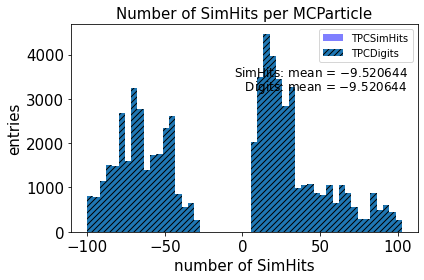

In [15]:
fig, ax = plt.subplots()
ax.hist(TPCSimHits['m_x'], bins=50, color='blue', alpha=0.5, label='TPCSimHits')
ax.hist(TPCSimHitcopy['m_x'], bins=50, hatch='////', label='TPCDigits')
#ax.hist(mergedMuonHits['S_x'], bins=50, hatch = '\ \ \ \ ', alpha = 0.5)
ax.set_xlabel('number of SimHits', fontsize=15)
ax.set_ylabel('entries', fontsize=15)
ax.tick_params(labelsize=15)
plt.title('Number of SimHits per MCParticle', fontsize=15)
plt.legend()
plt.figtext(.55, .72, r'SimHits: mean = $%f$' %(TPCSimHits['m_x'].mean()), fontsize=12)
plt.figtext(.567, .67, r' Digits: mean = $%f$' %(TPCSimHitcopy['m_x'].mean()), fontsize=12)
fig.tight_layout()
#plt.savefig('simhitdistribution.pdf')

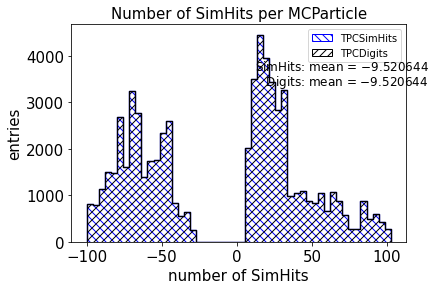

In [16]:
def plt_hist(axis, data, bins, color, hatch, label):
    counts, edges = np.histogram(data, bins=bins)
    edges = np.repeat(edges, 2)
    hist = np.hstack((0, np.repeat(counts, 2), 0))

    outline, = ax.plot(edges,hist,linewidth=1.3, color = color)        
    axis.fill_between(edges,hist,0,
                edgecolor=outline.get_color(), hatch = hatch, label=label, 
                facecolor = 'none')  ## < removes facecolor
    axis.set_ylim(0, None, auto = True)
    
fig, ax = plt.subplots(1)

ax.set_xlabel('number of SimHits', fontsize=15)
ax.set_ylabel('entries', fontsize=15)
ax.tick_params(labelsize=15)
plt.title('Number of SimHits per MCParticle', fontsize=15)

plt.figtext(.55, .72, r'SimHits: mean = $%f$' %(TPCSimHits['m_x'].mean()), fontsize=12)
plt.figtext(.567, .67, r' Digits: mean = $%f$' %(TPCSimHitcopy['m_x'].mean()), fontsize=12)
plt_hist(ax,TPCSimHits['m_x'], 50, 'blue', '\ \ \ ', 'TPCSimHits')
plt_hist(ax,TPCSimHitcopy['m_x'], 50, 'black', '///', 'TPCDigits')
plt.legend()

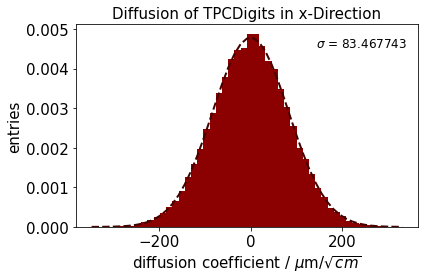

In [17]:
fig, ax = plt.subplots()
(mu, sigma) = stats.norm.fit(mergedMuonHits['xdiffnormed'])
n, bins, patches = ax.hist(mergedMuonHits['xdiffnormed'], bins=50, alpha=1,color='darkred', density=True)
y = stats.norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, color= '#410200', ls='--', linewidth=2)
ax.set_xlabel(r'diffusion coefficient / $\mu$m/$\sqrt{cm}$', fontsize=15)
ax.set_ylabel('entries', fontsize=15)
ax.tick_params(labelsize=15)
plt.title('Diffusion of TPCDigits in x-Direction', fontsize=15)
plt.figtext(.74, .82, r'$\sigma$ = $%f$' %(sigma), fontsize=12)
fig.tight_layout()
#plt.savefig('simhitdistribution.pdf')


In [18]:
MCRels = root_pandas.read_root('MCparticles_TPC.root', 'tree')
MCRels

,simhitcount
0,6043


In [1]:
TPCEvt = root_pandas.read_root('../../SimEvts_Belle2_11111.root', 'tree', f'TPCSimHits.m_pdg')
TPCEvt

NameError: name 'root_pandas' is not defined

In [2]:
test

NameError: name 'test' is not defined

In [10]:
import random
distance = np.zeros(10000)
for i in range(len(distance)):
    if i == 0:
        continue
    distance[i]=random.uniform(0,1)
distance.sort()
distance

array([0.00000000e+00, 3.76063483e-05, 9.44268445e-05, ...,
       9.99578994e-01, 9.99701477e-01, 9.99867873e-01])

In [11]:
delta = []
for i in range(len(distance)-1):
    delta.append(distance[i+1]-distance[i])
    
delta   

[3.7606348305740944e-05,
 5.682049621091867e-05,
 6.354880235126537e-05,
 0.00013990330640989423,
 0.00020405047429616907,
 8.004546605555607e-05,
 7.831424860982317e-05,
 0.00014634027783855252,
 4.92603752925147e-05,
 4.642011416811087e-06,
 0.0002993174602498039,
 8.450033044737904e-05,
 9.653305473300566e-05,
 0.00015067480739883177,
 6.355677633074208e-06,
 7.505295259335742e-05,
 0.0001634632111857659,
 0.000620543744504265,
 3.7628946359946625e-05,
 3.1581724687201884e-05,
 0.00022263104339237394,
 4.370420825572374e-06,
 2.8052734925121392e-05,
 0.0004616066175996414,
 0.0004180998207365949,
 4.512034951276167e-05,
 2.1484451273479088e-05,
 6.311816145521121e-06,
 5.352420554893822e-05,
 9.628374177261811e-05,
 0.00019340650330446074,
 7.538917456417771e-06,
 0.00022353642886530078,
 8.684457676344515e-05,
 0.0001405123098119354,
 2.1932794487811158e-05,
 1.2269064892045378e-05,
 0.00018980693777204127,
 0.00015053993030977875,
 0.00022966117963030275,
 1.6615471628567136e-05,


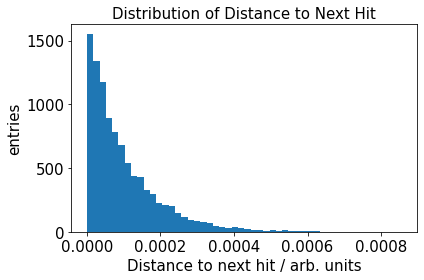

In [18]:
fig, ax = plt.subplots()

ax.hist(delta, bins=50)

ax.set_xlabel('Distance to next hit / arb. units', fontsize=15)

ax.set_ylabel('entries', fontsize=15)

ax.tick_params(labelsize=15)



plt.title('Distribution of Distance to Next Hit', fontsize=15)


fig.tight_layout()
plt.savefig('distancedistribution.pdf')
plt.show()
plt.close()